In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Odesa.csv")

In [3]:
print(data.describe())

              min          max      median
count  616.000000   616.000000  616.000000
mean     3.110471    48.901071   10.877370
std      3.709904   192.836490    7.956336
min      0.000000     6.580000    0.560000
25%      0.740000    20.367500    4.945000
50%      2.020000    30.550000    8.680000
75%      4.090000    42.607500   14.007500
max     28.620000  3401.000000   43.450000


In [4]:
print(data.loc[data["median"] == data["median"].max()])
print(data.loc[data["median"] == data["median"].min()])

         date    min    max  median
188  2/9/2023  26.01  97.95   43.45
         date  min    max  median
48  9/19/2022  0.0  11.44    0.56


In [5]:
data['date'] = pd.to_datetime(data['date'])

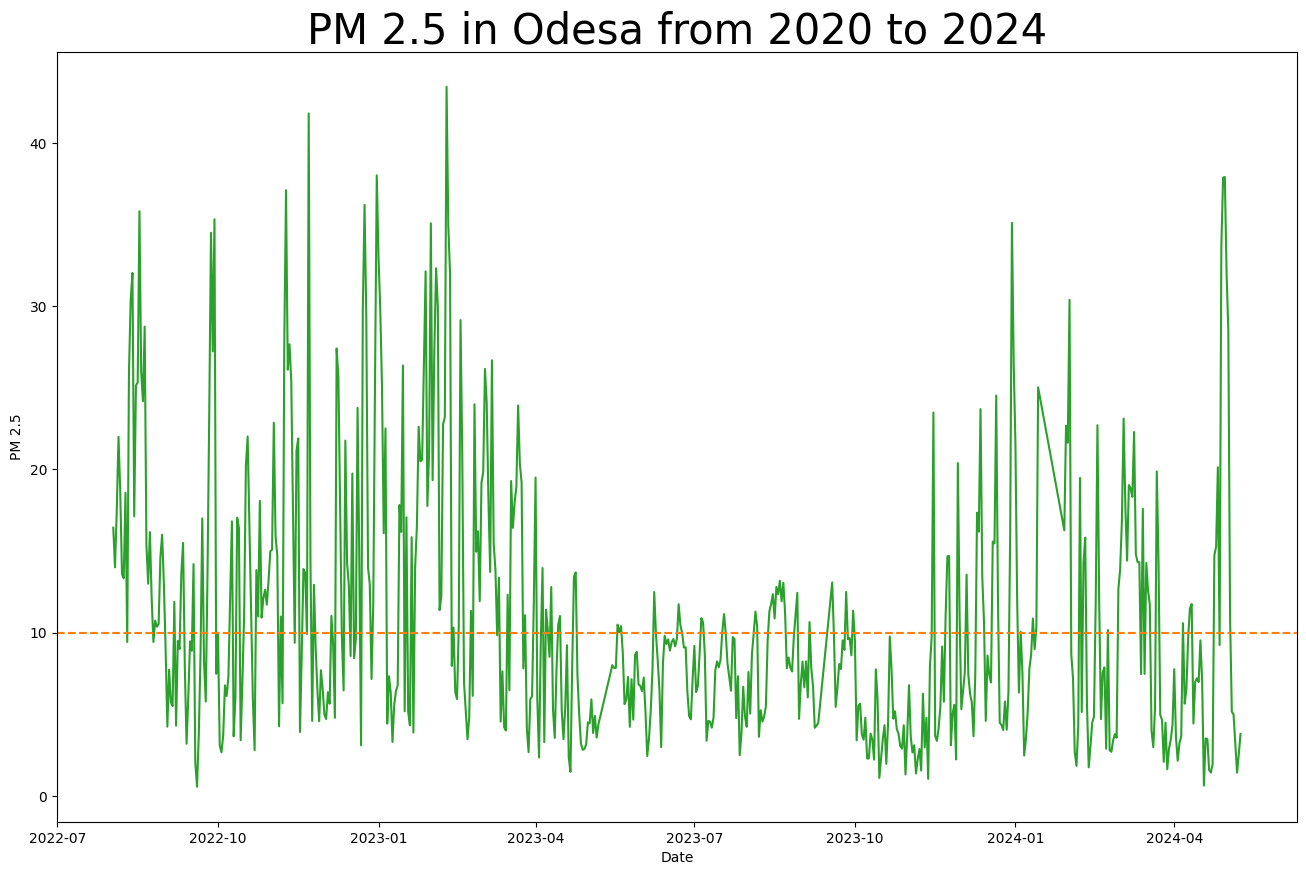

In [10]:
plt.figure(figsize=(16,10), dpi=100)
plt.plot(data.index, data["median"], color='tab:green', label='Median PM 2.5')
plt.gca().set( xlabel='Date', ylabel="PM 2.5")
plt.title("PM 2.5 in Odesa from 2020 to 2024", fontsize=30)
plt.axhline(y=10, color='tab:orange', linestyle='--', label='PM 2.5 = 25')
plt.show()

In [7]:
data = data.set_index('date')

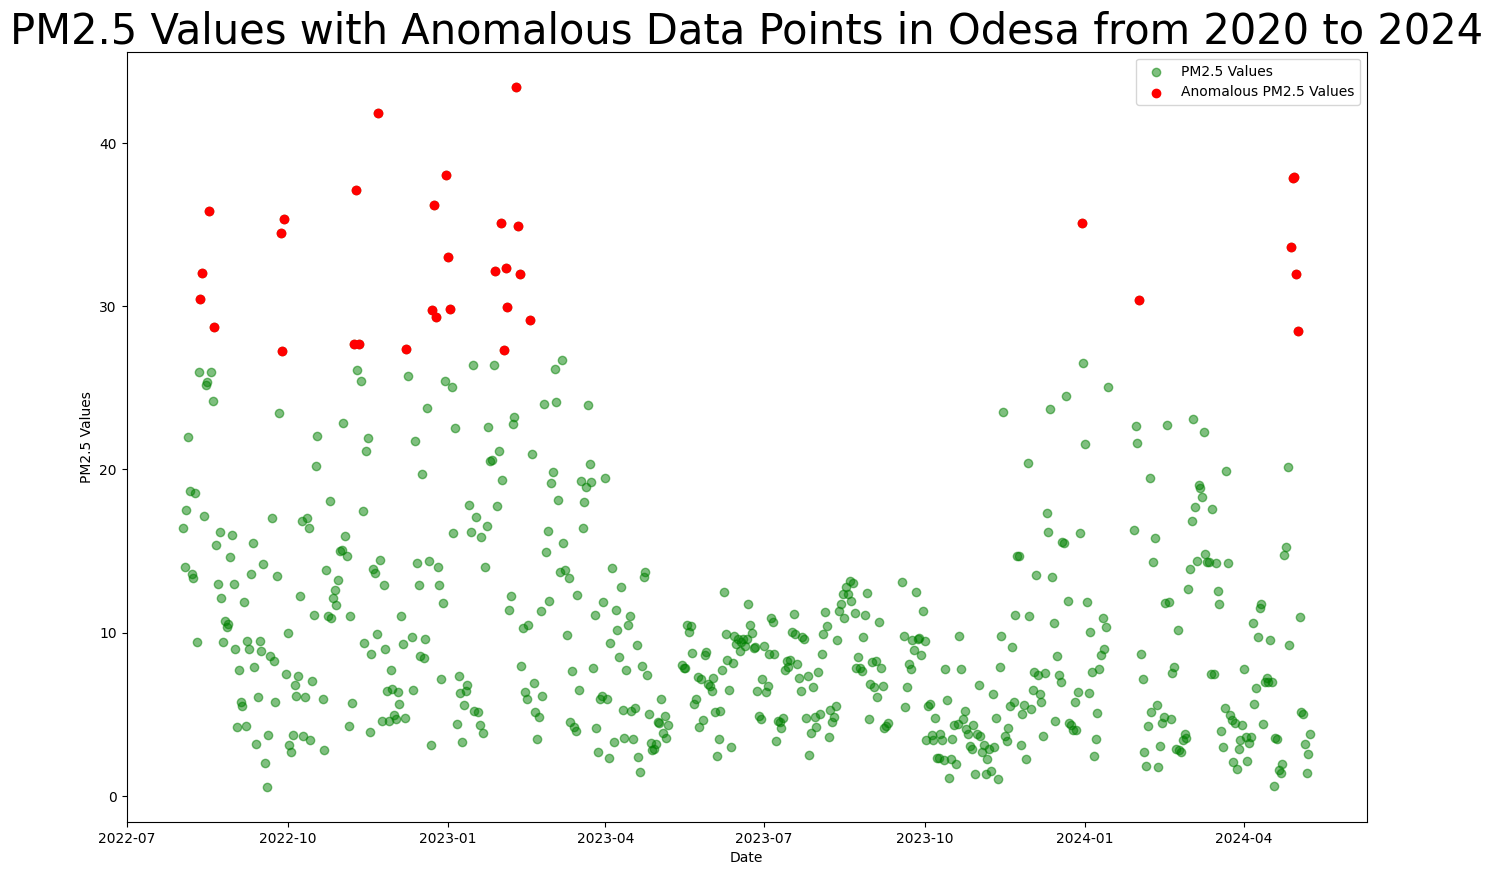

In [11]:
import matplotlib.pyplot as plt
from scipy import stats

data['z_score'] = stats.zscore(data["median"])
z_score_threshold = 2
anomalous_pm25_data = data[abs(data['z_score']) > z_score_threshold]

# Create the figure
plt.figure(figsize=(16, 10), dpi=100)

plt.scatter(data.index , data['median'], label='PM2.5 Values', color='green' ,  alpha=0.5)
plt.scatter(anomalous_pm25_data.index,  anomalous_pm25_data['median'], label='Anomalous PM2.5 Values', color='red'  )
plt.xlabel('Date')
plt.ylabel('PM2.5 Values')
plt.title('PM2.5 Values with Anomalous Data Points in Odesa from 2020 to 2024', fontsize=30)
plt.legend()
plt.show()